# 📊 Analisi della disoccupazione in Italia tra genitori (25–49 anni)

# Obiettivo del progetto

Questo progetto ha l’obiettivo di analizzare come la **presenza e il numero di figli** influenzino la **disoccupazione** tra uomini e donne in Italia, nella fascia d’età **25–49 anni**.

In particolare, si vuole osservare:

- Se esiste un **divario di genere** nella disoccupazione tra **madri e padri**
- Se il numero di figli ha un impatto maggiore sulla disoccupazione femminile rispetto a quella maschile
- Come cambia la situazione in termini sia **percentuali** che **assoluti** (numero di persone disoccupate)

L’analisi è stata realizzata utilizzando dati ISTAT, con il supporto di **Python** e delle librerie **Pandas**, **Seaborn** e **Matplotlib**.


                                   DATAFLOW FREQ REF_AREA   DATA_TYPE  \
0  IT1:723_1040_DF_DCCV_RUOLOFAMCOND_4(1.0)    A       IT  EMP_Y25-64   
1  IT1:723_1040_DF_DCCV_RUOLOFAMCOND_4(1.0)    A       IT  EMP_Y25-64   
2  IT1:723_1040_DF_DCCV_RUOLOFAMCOND_4(1.0)    A       IT  EMP_Y25-64   
3  IT1:723_1040_DF_DCCV_RUOLOFAMCOND_4(1.0)    A       IT  EMP_Y25-64   
4  IT1:723_1040_DF_DCCV_RUOLOFAMCOND_4(1.0)    A       IT  EMP_Y25-64   

  ROLE_IN_HOUSEHOLD SEX     AGE EDU_LEV_HIGHEST CITIZENSHIP  \
0                PA   F  Y25-49             ALL       TOTAL   
1                PA   F  Y25-49             ALL       TOTAL   
2                PA   F  Y25-49             ALL       TOTAL   
3                PA   F  Y25-49             ALL       TOTAL   
4                PA   F  Y25-64             ALL       TOTAL   

  NUMBER_OF_CHILDREN  ... NOTE_SEX  NOTE_AGE  NOTE_EDU_LEV_HIGHEST  \
0                 N1  ...      NaN       NaN                   NaN   
1              N1_GE  ...      NaN       N

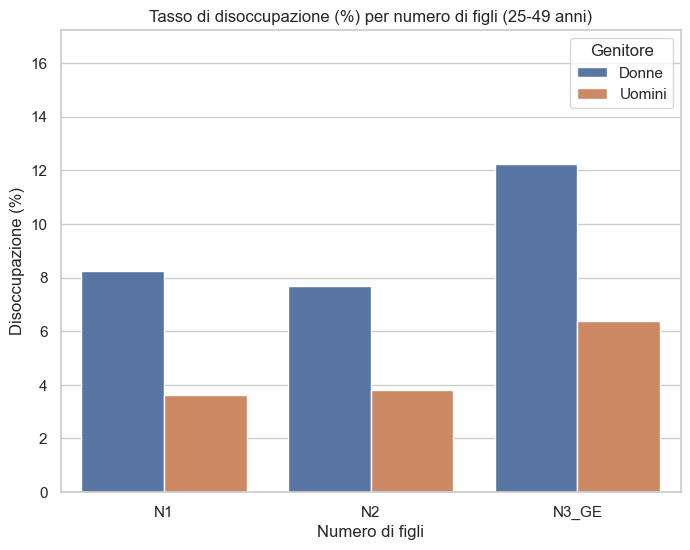

Grafico con il numero di genitori disoccupati , numeri assoluti


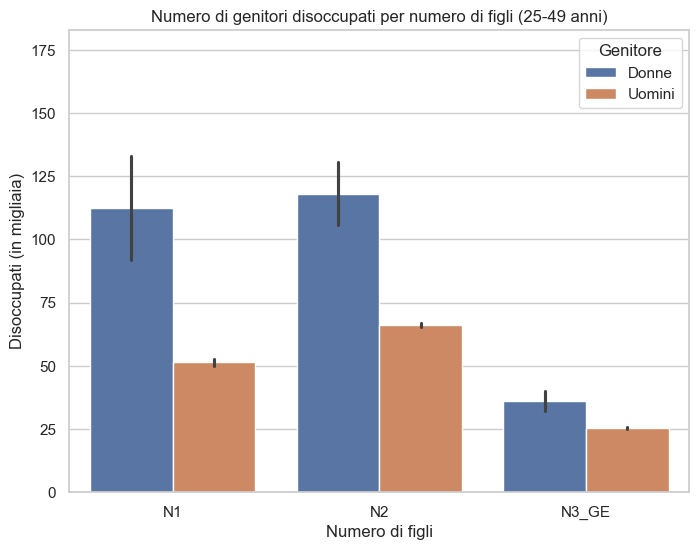

['N1' 'N1_GE' 'N2' 'N3_GE']
['N1' 'N1_GE' 'N2' 'N3_GE']
                                     DATAFLOW FREQ REF_AREA     DATA_TYPE  \
1    IT1:723_1040_DF_DCCV_RUOLOFAMCOND_4(1.0)    A       IT    EMP_Y25-64   
5    IT1:723_1040_DF_DCCV_RUOLOFAMCOND_4(1.0)    A       IT    EMP_Y25-64   
9    IT1:723_1040_DF_DCCV_RUOLOFAMCOND_4(1.0)    A       IT    EMP_Y25-64   
13   IT1:723_1040_DF_DCCV_RUOLOFAMCOND_4(1.0)    A       IT    EMP_Y25-64   
17   IT1:723_1040_DF_DCCV_RUOLOFAMCOND_4(1.0)    A       IT    EMP_Y25-64   
..                                        ...  ...      ...           ...   
653  IT1:723_1040_DF_DCCV_RUOLOFAMCOND_4(1.0)    A     ITFG  UNEMP_Y25-64   
657  IT1:723_1040_DF_DCCV_RUOLOFAMCOND_4(1.0)    A     ITFG  UNEMP_Y25-64   
661  IT1:723_1040_DF_DCCV_RUOLOFAMCOND_4(1.0)    A     ITFG  UNEMP_Y25-64   
665  IT1:723_1040_DF_DCCV_RUOLOFAMCOND_4(1.0)    A     ITFG  UNEMP_Y25-64   
669  IT1:723_1040_DF_DCCV_RUOLOFAMCOND_4(1.0)    A     ITFG  UNEMP_Y25-64   

    ROLE_IN_HOUSEHO

In [5]:
#importo le librerie
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#imposto lo stile grafico per i grafici di seaborn sfondo bianco e griglia
sns.set(style="whitegrid")

# Caricamento dei dati dai file csv , nelle variabili DF come tabella
df_donne = pd.read_csv("dati/donne.csv")
df_uomini = pd.read_csv("dati/uomini.csv")

# Mostra le prime righe per conferma
print(df_donne.head())
#FILTRO I DATI DISOCCUPATI E FORZE LAVORO PER DONNE mettendo nel nuovo df POI filtro il df UOMINI
# DONNE - Disoccupate, copy per creare una copia altrimenti
#il nuovo df sarebbe stato solo una vista ed eventuale modifiche potevano modificare il df originale
#oltre gli waring
df_donne_disocc = df_donne[
    (df_donne["SEX"] == "F") &
    (df_donne["AGE"] == "Y25-49") &
    (df_donne["DATA_TYPE"] == "UNEMP_Y25-64")
].copy()
#Aggiunge una nuova colonna chiamata "tipo" con valore "disoccupati" per ogni riga.
df_donne_disocc["tipo"] = "disoccupati"
df_donne_disocc["sesso"] = "Donne"
#rinomino la colonna cosi capisco meglio
df_donne_disocc = df_donne_disocc.rename(columns={"OBS_VALUE": "valore"})

# DONNE - Forze lavoro, FILTRO , AGGIUNGO COLONNE E RINOMINO
df_donne_forze = df_donne[
    (df_donne["SEX"] == "F") &
    (df_donne["AGE"] == "Y25-49") &
    (df_donne["DATA_TYPE"] == "FOR_Y25-64")#FORZE LAVORO OCCUPATI +DISOCCUPATI
].copy()#LAVORO SU UNA COPIA INDIPENDENTE
#aggiungo queste righe per unire con altri dati
df_donne_forze["tipo"] = "forze_lavoro"#AGGIUNGO UNA COLONNA tipo con valore forze_lavoro per ogni riga
df_donne_forze["sesso"] = "Donne"
#rinomino la colonna OBS_VALUE in valore
df_donne_forze = df_donne_forze.rename(columns={"OBS_VALUE": "valore"})

# UOMINI - Disoccupati
#filtro gli uomini disoccupati 25-49
df_uomini_disocc = df_uomini[
    (df_uomini["SEX"] == "M") &
    (df_uomini["AGE"] == "Y25-49") &
    (df_uomini["DATA_TYPE"] == "UNEMP_Y25-64")
].copy()
#cambio nome per fare il per unione successiva
df_uomini_disocc["tipo"] = "disoccupati"
df_uomini_disocc["sesso"] = "Uomini"
#rinomino la colonna
df_uomini_disocc = df_uomini_disocc.rename(columns={"OBS_VALUE": "valore"})

# UOMINI - Forze lavoro
df_uomini_forze = df_uomini[
    (df_uomini["SEX"] == "M") &
    (df_uomini["AGE"] == "Y25-49") &
    (df_uomini["DATA_TYPE"] == "FOR_Y25-64")
].copy()
#aggiungo tipo e sesso per l'unione successiva
df_uomini_forze["tipo"] = "forze_lavoro"
df_uomini_forze["sesso"] = "Uomini"
df_uomini_forze = df_uomini_forze.rename(columns={"OBS_VALUE": "valore"})

#ho 4 blocchi filtrati: donne_disocc, donne_forze, uomini_disocc, uomini_forze
#gli unisco per costruire il dataset finale da cui calcolare i tassi
#UNIONE DEI DATI E CALCOLO DEI TASSO %
# Unione dei dati donne e uomini, disoccupati + forze lavoro
#Ogni riga di ogni DataFrame verrà aggiunta una dopo l’altra
#tutte le tabelle hanno le stesse colonne
df_unione = pd.concat([
    df_donne_disocc, df_donne_forze,
    df_uomini_disocc, df_uomini_forze
])

# creo Tabella pivot per avere disoccupati e forze lavoro affiancati
df_pivot = df_unione.pivot_table(
    index=["NUMBER_OF_CHILDREN", "sesso"],#ogni riga sarà combinazione di nr di figli(N1,N2,N3 e sesso
    columns="tipo",#le colonne saranno tipo:disoccupati, forze_lavoro
    values="valore"
).reset_index()

# Calcolo del tasso di disoccupazione in percentuale
df_pivot["Tasso_disoccupazione"] = (
    df_pivot["disoccupati"] / df_pivot["forze_lavoro"] * 100
)

# Rinominiamo la colonna dei figli per renderla più leggibile
df_pivot = df_pivot.rename(columns={"NUMBER_OF_CHILDREN": "Numero_figli"})
# Filtra df_pivot per escludere la categoria N1_GE
df_pivot_filtrato = df_pivot[df_pivot["Numero_figli"].isin(["N1", "N2", "N3_GE"])]

#grafico A BARRE CON TASSO DI DISOCCUPAZIONE IN % PER NR DI FIGLI CONFRONTO TRA DONNE E UOMIN 
plt.figure(figsize=(8,6))# matplotlib → imposta dimensioni

# seaborn → disegna il grafico , hue -aggiunge colore diverso per uomini e donne
ax = sns.barplot(data=df_pivot_filtrato, x="Numero_figli", y="Tasso_disoccupazione", hue="sesso")
# matplotlib → aggiunge titolo
plt.title("Tasso di disoccupazione (%) per numero di figli (25-49 anni)")
plt.ylabel("Disoccupazione (%)")
plt.xlabel("Numero di figli")
plt.ylim(0, df_pivot_filtrato["Tasso_disoccupazione"].max() + 5)#imposta limite massimo sull'asse y
plt.legend(title="Genitore")#aggiunge legenda
#salvo il grafico nella cartella
plt.savefig("grafico_tasso_disoccupazione_per_nr_di_figli.png",dpi=300,bbox_inches='tight') 

plt.show()
#Preparo il tutto per fare il grafico con i dati espressi in migliaia
#Usiamo i due DataFrame df_donne_disocc e df_uomini_disocc, già filtrati e pronti.

# Unione dei disoccupati donne e uomini , senza i dati forza lavoro
df_disoccupati_assoluti = pd.concat([df_donne_disocc, df_uomini_disocc])

# Selezioniamo solo le colonne utili
df_disoccupati_assoluti = df_disoccupati_assoluti[["NUMBER_OF_CHILDREN", "valore", "sesso"]]
df_disoccupati_assoluti = df_disoccupati_assoluti.rename(columns={
    "NUMBER_OF_CHILDREN": "Numero_figli",
    "valore": "Disoccupati_migliaia"
})
# Escludiamo N1_GE dai dati per il grafico dei valori assoluti
df_disoccupati_filtrato = df_disoccupati_assoluti[df_disoccupati_assoluti["Numero_figli"].isin(["N1", "N2", "N3_GE"])]

#GRAFICO A BARRE VALORI ASSOLUTI
print("Grafico con il numero di genitori disoccupati , numeri assoluti")
plt.figure(figsize=(8,6))# matplotlib → imposta dimensioni
# seaborn → disegna il grafico
ax = sns.barplot(data=df_disoccupati_filtrato, x="Numero_figli", y="Disoccupati_migliaia", hue="sesso")
# matplotlib → aggiunge titolo
plt.title("Numero di genitori disoccupati per numero di figli (25-49 anni)")
plt.ylabel("Disoccupati (in migliaia)")
plt.xlabel("Numero di figli")
plt.ylim(0, df_disoccupati_filtrato["Disoccupati_migliaia"].max() + 50)
plt.legend(title="Genitore")
#salvo il grafico nella cartella
plt.savefig("grafico_numeri_disoccupazione_per_nr_di_figli.png",dpi=300,bbox_inches='tight') 
#visualizzo il grafico
plt.show()
#controllo per errori N1 e N1_GE
print(df_donne["NUMBER_OF_CHILDREN"].unique())
print(df_uomini["NUMBER_OF_CHILDREN"].unique())
print(df_donne[df_donne["NUMBER_OF_CHILDREN"] == "N1_GE"])
print(df_uomini[df_uomini["NUMBER_OF_CHILDREN"] == "N1_GE"])

#Ho scelto di eliminare la colonna N1_GE perche i dati potevano essere contati due volte
#1figlio o più includeva anche 2 figli?

### 📊 Osservazioni sui valori assoluti (in migliaia)

Il grafico mostra il **numero di genitori disoccupati** per categoria di figli (25–49 anni), espresso in **migliaia di persone**.

- Le **madri disoccupate** sono sempre più numerose rispetto ai padri, in tutte le categorie di figli.
- Il divario più evidente si osserva tra i genitori con **2 o più figli**, dove le donne rappresentano la **maggioranza assoluta** dei disoccupati.
- Anche con un solo figlio (`N1`), le donne superano nettamente gli uomini in termini assoluti.
- Questo conferma che la disoccupazione femminile **non è solo una questione percentuale**, ma anche **di impatto numerico reale** sulla società.

💡 L'analisi dei valori assoluti evidenzia la necessità di **azioni concrete e strutturate** a sostegno dell'occupazione femminile, soprattutto per le madri.


#OSSERVAZIONI GRAFICO TASSO DI DISOCCUPAZIONE % PER NUMERO DI FIGLI
Il grafico mostra il tasso di disoccupazione (%) tra donne e uomini, nella fascia d’età 25–49 anni, in funzione del numero di figli.

Il tasso di disoccupazione è sistematicamente più alto tra le donne rispetto agli uomini in tutte le categorie.

La disoccupazione aumenta all’aumentare del numero di figli tra le donne, mentre rimane relativamente stabile per gli uomini.

Le madri con tre o più figli (N3_GE) mostrano il tasso di disoccupazione più alto tra tutte le categorie analizzate.

Questa tendenza suggerisce una penalizzazione evidente per le donne nel mercato del lavoro legata alla maternità, specialmente con figli piccoli o numerosi.

Per gli uomini, la presenza di figli non sembra incidere negativamente sull’occupazione, suggerendo un divario di genere persistente.



### 📊 Osservazioni sul tasso di disoccupazione (%)

Questo grafico mostra il **tasso di disoccupazione (%)** tra donne e uomini italiani, nella fascia d’età **25–49 anni**, in funzione del **numero di figli**.

#### 👩 Donne:
- Il tasso di disoccupazione femminile cresce all’aumentare del numero di figli.
- Le madri con **3 o più figli** (`N3_GE`) sono le più penalizzate nel mercato del lavoro.
- Anche con un solo figlio (`N1`), il tasso resta sensibilmente più alto rispetto agli uomini.

#### 👨 Uomini:
- I padri mostrano un tasso di disoccupazione **molto più basso** in tutte le categorie.
- La presenza di figli **non sembra influenzare negativamente** l’occupazione maschile.
- Il divario con le madri è presente anche già a partire da un solo figlio.

#### 💡 Conclusione:
Questa analisi mette in luce una **forte disuguaglianza di genere** nel rapporto tra genitorialità e disoccupazione.  
La maternità risulta un fattore penalizzante nel lavoro, mentre la paternità non lo è.  
Questi dati evidenziano la necessità di riflettere su **politiche familiari e parità di accesso al lavoro**, soprattutto per le donne con figli.


### 📊 Osservazioni sui valori assoluti (in migliaia)

Il grafico mostra il **numero di genitori disoccupati** per categoria di figli (25–49 anni), espresso in **migliaia di persone**.

- Le **madri disoccupate** sono sempre più numerose rispetto ai padri, in tutte le categorie di figli.
- Il divario più evidente si osserva tra i genitori con **2 o più figli**, dove le donne rappresentano la **maggioranza assoluta** dei disoccupati.
- Anche con un solo figlio (`N1`), le donne superano nettamente gli uomini in termini assoluti.
- Questo conferma che la disoccupazione femminile **non è solo una questione percentuale**, ma anche **di impatto numerico reale** sulla società.

💡 L'analisi dei valori assoluti evidenzia la necessità di **azioni concrete e strutturate** a sostegno dell'occupazione femminile, soprattutto per le madri.


### 🔚 Conclusione

L’analisi dei dati ha evidenziato una significativa **disparità di genere** nel tasso di disoccupazione in Italia tra i 25 e i 49 anni, in relazione alla presenza e al numero di figli.

- Le **donne** risultano **sistematicamente più penalizzate** nel mercato del lavoro rispetto agli uomini, già con un solo figlio.
- I **tassi di disoccupazione** crescono con l’aumentare del numero di figli per le donne, mentre rimangono stabili per gli uomini.
- Anche i **valori assoluti** confermano che le madri disoccupate rappresentano una **quota numerica importante**.

Questi risultati sottolineano la necessità di politiche pubbliche e aziendali più eque, che sostengano concretamente l'occupazione femminile, in particolare delle madri.

🔍 L’approccio con Python ha permesso di visualizzare chiaramente i dati e raccontare una realtà ancora troppo silenziosa.
